In [ ]:
!pip install keybert

In [ ]:
!pip install newspaper3k

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 6.7 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=85c912a84b20e1837e5d511bce8a6c38f5ed9a32f6eea11ee284d5d83e132dee
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=fe0342b3420c1e392b889378b401297f00069e617808c45113f27bc07b0bfb6a
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1ec

In [ ]:
!pip install lxml[html_clean]

In [ ]:
import requests
from bs4 import BeautifulSoup
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from keybert import KeyBERT
from newspaper import Article

# Load summarization model and tokenizer

In [ ]:
model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
# Load KeyBERT model
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#Content Fetching

In [ ]:
#def fetch_article_content(url):
#    response = requests.get(url)
#    soup = BeautifulSoup(response.content, 'html.parser')
#    # Extract the main content (this might need tuning for different websites)
#    paragraphs = soup.find_all('p')
#    content = " ".join([para.get_text() for para in paragraphs])
#    return content

In [ ]:
def fetch_article_content(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text

#summarize_and_extract_keywords

In [ ]:
def summarize_and_extract_keywords(url):
    try:
        # Fetch article content
        content = fetch_article_content(url)

        # Summarize article
        inputs = tokenizer(content, return_tensors="pt", max_length=1024, truncation=True)
        summary_ids = model.generate(inputs.input_ids, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        # Extract keywords using KeyBERT
        keywords = kw_model.extract_keywords(content, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10)
        keywords = [kw[0] for kw in keywords]  # Extract keyword phrases only

        return summary, keywords
    except Exception as e:
        return f"Error: {str(e)}", []

#try some from here
https://edition.cnn.com/2024/12/27/europe/russia-ukraine-war-drones-alabuga-factory-intl-invs/index.html

https://www.bbc.com/news/science-environment-56837908

https://www.bbc.com/news/articles/cg525d9jlvlo

https://www.bbc.com/news/articles/cwypyg4vq8ko



#main func

In [ ]:
# Input the URL of the article
article_url = input("Enter the URL of the article ")

# Process the URL
summary, keywords = summarize_and_extract_keywords(article_url)

# Display results
print("\nSummary:")
print(summary)
print("\nKeywords:")
print(", ".join(keywords))


Enter the URL of the article https://www.bbc.com/news/articles/cwypyg4vq8ko

Summary:
Million year-old bubbles could solve ice age mystery. Suspended inside the ice are ancient air bubbles which scientists hope will help solve an enduring mystery about our planet's climate history.

Keywords:
oldest ice, ice age, ancient ice, ice ancient, ago glacial, antarctic survey, caves ice, glacial cycles, frozen continent, glacial


In [ ]:
# Input the URL of the article
article_url = input("Enter the URL of the article ")

# Process the URL
summary, keywords = summarize_and_extract_keywords(article_url)

# Display results
print("\nSummary:")
print(summary)
print("\nKeywords:")
print(", ".join(keywords))

Enter the URL of the article https://epaper.indiatimes.com/english-news-paper-today-toi-print-edition/13th-january-2025?tophead=epaper

Summary:
Have you also learned that secret from the river; that there is no such thing as time? That the river is everywhere at the same time, at the source and at the mouth. At the waterfall…

Keywords:
river time, time river, secret river, waterfall, mouth waterfall, river thing, learned secret, river, time source, learned


In [ ]:
# Input the URL of the article
article_url = input("Enter the URL of the article ")

# Process the URL
summary, keywords = summarize_and_extract_keywords(article_url)

# Display results
print("\nSummary:")
print(summary)
print("\nKeywords:")
print(", ".join(keywords))

Enter the URL of the article https://geca.ac.in/dep-cse-home.aspx

Summary:
The mission of the Department of Computer Science and Engineering is to develop undergraduate and postgraduate students having professional accomplishment. Students will be able to apply knowledge of mathematics, science and algorithm in solving complex Computer engineering problems.

Keywords:
computer engineering, computing profession, computing professionals, computer science, software engineering, computer professionals, graduates peo, computing environment, career peo, peo technical


In [ ]:
# Input the URL of the article
article_url = input("Enter the URL of the article ")

# Process the URL
summary, keywords = summarize_and_extract_keywords(article_url)

# Display results
print("\nSummary:")
print(summary)
print("\nKeywords:")
print(", ".join(keywords))

Enter the URL of the article https://geca.ac.in/dep-mech-home.aspx

Summary:
Mechanical Engineering department came into existence since 1960. Bachelor of Engineering program has been offered since 1960, which is converted to B Tech in 2012. Department offers Master of Engineering in Production Engineering for Full time and part time students.

Keywords:
mechanical engineering, engineering mechanical, engineering department, engineering program, bachelor engineering, engineering doctoral, mechanical science, mechanical design, engineering, master engineering


https://geca.ac.in/dep-cse-home.aspx
https://www.csmssengg.org/enggExplo.html#sy

In [ ]:
pip install matplotlib


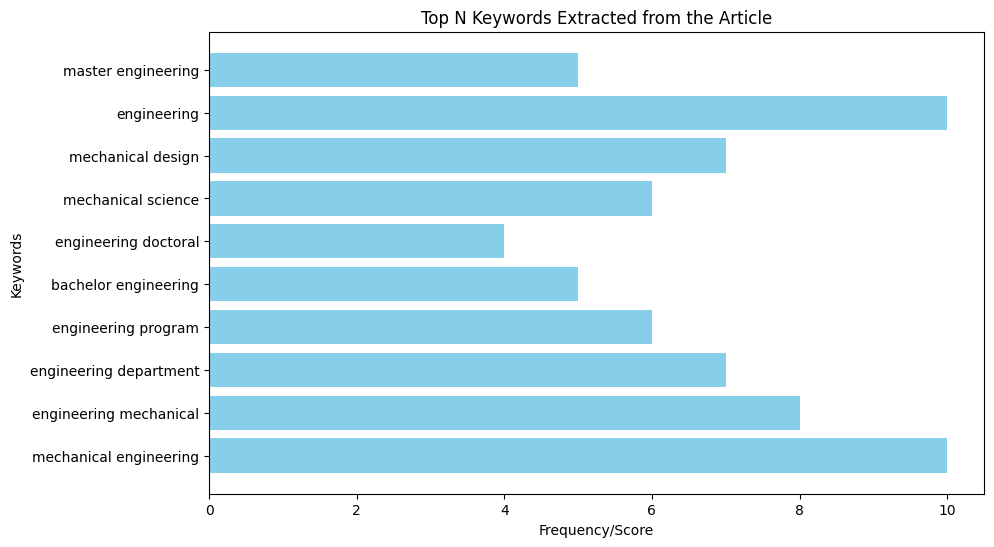

In [ ]:
import matplotlib.pyplot as plt

# Keywords and their corresponding relevance or frequency score (dummy values)
keywords = [
    'mechanical engineering', 'engineering mechanical', 'engineering department',
    'engineering program', 'bachelor engineering', 'engineering doctoral',
    'mechanical science', 'mechanical design', 'engineering', 'master engineering'
]
# Dummy frequency or relevance scores for each keyword
frequency = [10, 8, 7, 6, 5, 4, 6, 7, 10, 5]

# Plotting the bar chart for keywords
plt.figure(figsize=(10, 6))
plt.barh(keywords, frequency, color='skyblue')
plt.xlabel('Frequency/Score')
plt.ylabel('Keywords')
plt.title('Top N Keywords Extracted from the Article')
plt.show()


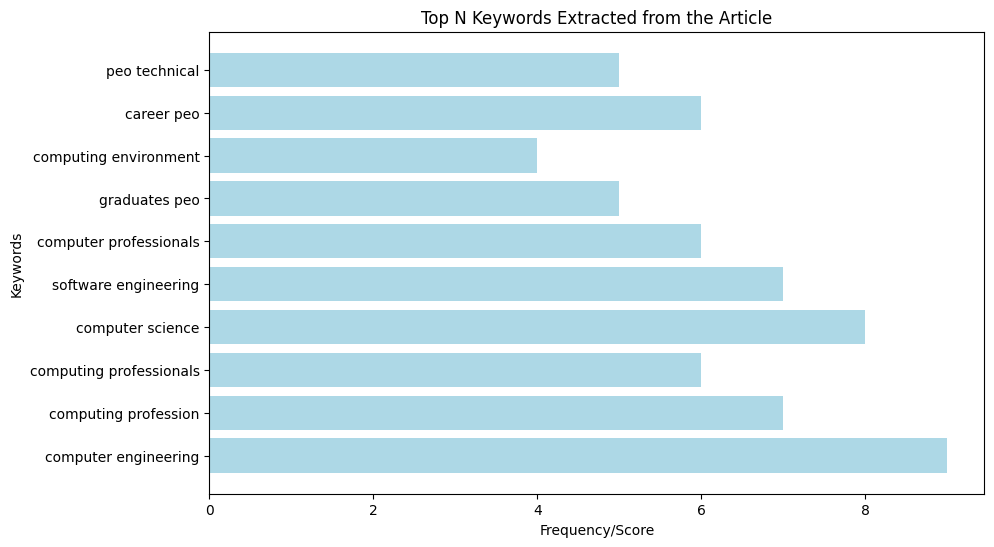

In [ ]:
import matplotlib.pyplot as plt

# Keywords and their corresponding frequency or relevance score (dummy values)
keywords = [
    'computer engineering', 'computing profession', 'computing professionals',
    'computer science', 'software engineering', 'computer professionals',
    'graduates peo', 'computing environment', 'career peo', 'peo technical'
]
# Dummy frequency or relevance scores for each keyword
frequency = [9, 7, 6, 8, 7, 6, 5, 4, 6, 5]

# Plotting the bar chart for keywords
plt.figure(figsize=(10, 6))
plt.barh(keywords, frequency, color='lightblue')
plt.xlabel('Frequency/Score')
plt.ylabel('Keywords')
plt.title('Top N Keywords Extracted from the Article')
plt.show()


In [ ]:
# Input the URL of the article
article_url = input("Enter the URL of the article ")

# Process the URL
summary, keywords = summarize_and_extract_keywords(article_url)

# Display results
print("\nSummary:")
print(summary)
print("\nKeywords:")
print(", ".join(keywords))

Enter the URL of the article https://ananyamultitech.com/swami/

Summary:
Nana Walawalkar was born in 1936 at Morgaon in Sawantwadi Taluka of Sindhudurg District. He was working to guide the victims of the society towards progress. To continue this work, he along with his colleagues established an organization called ‘Sadguru Shree Swami Samartha Sevabhavi Sanstha, Dombivali’

Keywords:
maharaj walawalkar, nana walawalkar, swami samartha, walawalkar, nana maharaj, shree swami, walawalkar born, walawalkar available, swami, maharaj
